# The Marketing Campaigns (Deposito Subscribed) - EDA

#### Data source :
   https://drive.google.com/file/d/1mvNj8sFFDC5FKMlMd6IHF85eRGfhyBtc/view?usp=sharing
    
#### Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

    Number of Instances: 45211 for bank-full.csv
    Number of Attributes: 16 + output attribute.

#### targets to be achieved :
 1. What is the tendency of a person to subscribe to deposits based on age, balance, day, duration, campaign, pdays, and     previous?
 2. What is the proportion of deposit subscriptions on the data?
 3. What groups have a deposit subscription tendency based on the categories of age, job, marital, education, default,       balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome?
 4. What data has a strong correlation affecting someone subscribing to deposits?


### FEATURE DESCRIPTION :

##### bank client data:
>   - age (numeric)
>   - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
>   - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
>   - education (categorical: "unknown","secondary","primary","tertiary")
>   - default: has credit in default? (binary: "yes","no")
>   - balance: average yearly balance, in euros (numeric) 
>   - housing: has housing loan? (binary: "yes","no")
>   - loan: has personal loan? (binary: "yes","no")
##### related with the last contact of the current campaign:
>   - contact: contact communication type (categorical: "unknown","telephone","cellular") 
>   - day: last contact day of the month (numeric)
>   - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
>   - duration: last contact duration, in seconds (numeric)
##### other attributes:
>   - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
>   - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
>   - previous: number of contacts performed before this campaign and for this client (numeric)
>   - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
##### Output variable (desired target):
>   - y: client subscribed

#### IMPORT LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
import warnings 
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

 #### OVERVIEW

> Langkah pertama, load semua datanya.



In [6]:
df = pd.read_csv("bank-full.csv", delimiter=";")

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40631,30,self-employed,married,tertiary,no,2666,no,no,cellular,5,aug,475,2,93,4,success,yes
9891,45,admin.,married,secondary,no,967,no,no,unknown,9,jun,63,1,-1,0,unknown,no
37019,55,retired,married,secondary,no,918,yes,no,cellular,13,may,87,3,364,1,failure,no
24757,36,self-employed,single,secondary,no,15,no,no,cellular,18,nov,186,2,-1,0,unknown,no
29242,29,management,single,tertiary,no,642,no,no,cellular,2,feb,156,3,-1,0,unknown,no


In [10]:
# melihat shape data df

df.shape

(45211, 17)

> lalu lihat info data, apakah bisa dengan 2 cara di bawah ini, lslpilih salah satu saja.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
data = pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values, 
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(1)) for i in df.columns]}).reset_index(drop = True)


data.sort_values(by = "null", ascending = False)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,age,int64,0,0.0,77,[30]
9,day,int64,0,0.0,31,[17]
15,poutcome,object,0,0.0,4,[failure]
14,previous,int64,0,0.0,41,[19]
13,pdays,int64,0,0.0,559,[205]
12,campaign,int64,0,0.0,48,[5]
11,duration,int64,0,0.0,1573,[810]
10,month,object,0,0.0,12,[mar]
8,contact,object,0,0.0,3,[telephone]
1,job,object,0,0.0,12,[retired]


> Tidak Terdapat Null values pada beberapa features.

> describe() digunakan untuk melihat measure of central tendency, quantile, min dan max pada setiap features.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


> Dibawah ini adalah describe() untuk data selian numeric. Terdapat unique (kategori yg berbeda), top (data tersering muncul), dan freq (jumlah seringnya muncul).

In [14]:
df.describe(include = 'object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [15]:
# Kelompokkan data type boolean

df.select_dtypes(['bool']).head(3)

""
0
1
2


In [16]:
df.describe(include = (['float64', 'int64'])).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


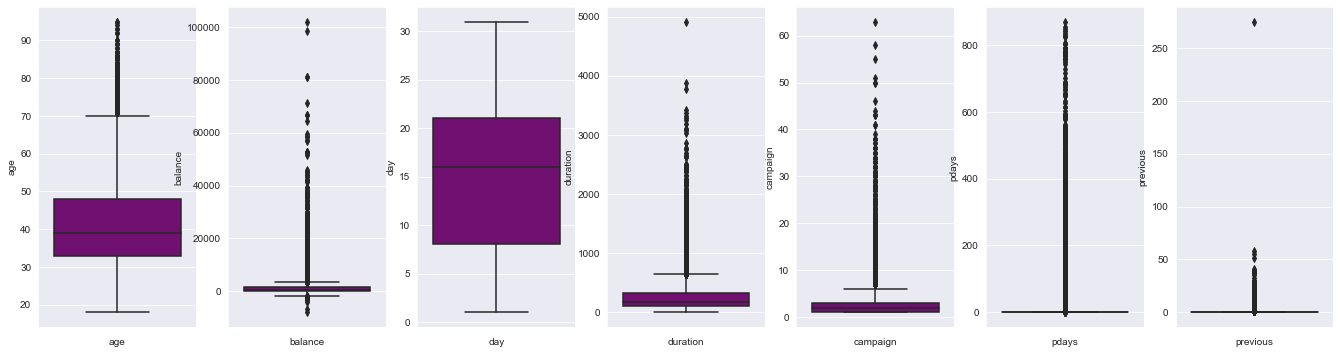

In [163]:
plt.figure(figsize=(30,20))
features = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
for i in range(0, len(features)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df[features[i]], color ='Purple',orient='v')
    plt.xlabel(features[i])

> Berdasarka Boxplot, diketahui bahwa terdapat Outlier pada Feature MonthlyIncome sehingga perlu dihandling pada processing

# 
# PREPROCESSING

##### 1. Drop data yang tidak perlu

In [18]:
data.sort_values(by = "null", ascending = False)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,age,int64,0,0.0,77,[30]
9,day,int64,0,0.0,31,[17]
15,poutcome,object,0,0.0,4,[failure]
14,previous,int64,0,0.0,41,[19]
13,pdays,int64,0,0.0,559,[205]
12,campaign,int64,0,0.0,48,[5]
11,duration,int64,0,0.0,1573,[810]
10,month,object,0,0.0,12,[mar]
8,contact,object,0,0.0,3,[telephone]
1,job,object,0,0.0,12,[retired]


> Berdasarkan hasil diatas, dapat diketahui bahwa tidak ada data missing value/null sehingga tidak perlu melakukan handling missing value/ null dengan drop data.

##### 2. Setelah itu kelompokkan data berdasarkan tipenya.

In [19]:
# Kelompokkan data type object

df.select_dtypes(['object']).head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no


In [20]:
# Kelompokkan data type int dan float

df.select_dtypes(['bool']).head(3)

""
0
1
2


In [21]:
# Kelompokkan data type int dan float

df.select_dtypes(['float64', 'int64']).head(3)

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0


> Data yang dibutuhkan sudah memenuhi dtype dan sudah bersih dari Na
maka dilanjutkan dengan EDA

3. Ubah data category ("yes", "no") menjadi data dummy (1,0)
hal ini berguna untuk memudahkanproses analsi data karena bentuk data telah berubah menjadi integer.

In [133]:
# Menandai data "y" yaitu subsciber menjadi data dummy dengan "yes" sebagai 1 dan "no" sebagai 0

df["left"] = np.where(df["y"] == "yes",1,0)

In [134]:
#cek pembaruan data

df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,left
41621,47,admin.,married,secondary,no,2601,no,no,cellular,24,sep,261,1,-1,0,unknown,yes,1
9780,52,housemaid,divorced,primary,no,3899,no,no,unknown,9,jun,49,1,-1,0,unknown,no,0
18146,40,admin.,married,secondary,yes,-444,no,yes,telephone,30,jul,168,8,-1,0,unknown,no,0
24542,34,admin.,single,secondary,no,601,no,no,cellular,17,nov,184,3,-1,0,unknown,no,0
19232,59,retired,married,secondary,no,0,no,no,cellular,6,aug,142,2,-1,0,unknown,no,0


# 

# EXPLORATORY DATA ANALYSIS

#### a. Numerical Analysis

### 1. Bagaimana kecenderungan seseorang untuk berlangganan deposito berdasarkan age, balance, day, duration, campaign, pdays, dan previous ?
Untuk menjawab target no.1 maka diperlukan untuk menganalisis data ekslporasi pada data numerik

- mulai dengan analisis data ekslporasi pada data numerik
> buat Function yang dapat memvisulisasikan data numerik dalam boxplot da distribution plot sekaligus

In [173]:
def NumericalVariable_Analysist(df, segment_by, target= "y"):
    """a function"""
    fig, ax = plt.subplots(ncols= 2, figsize=(14,6))
    
    #boxplot for comparison
    sns.boxplot(data=df, x = target, y = segment_by, palette= "RdPu", ax=ax[0]) 
    ax[0].set_title("Comparison of " + segment_by + " & " + target) 
    
     #distribution plot
    ax[1].set_title("Distribution of " + segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

> Age

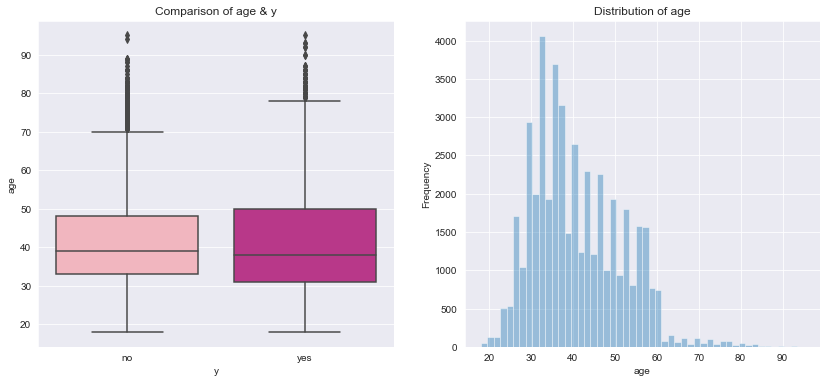

In [175]:
NumericalVariable_Analysist(df, "age", target= "y")

- Berdasarkan ouput boxplot, dapat diketahui bahwa pada data Age Data memiliki cukup banyak outlier di atas IQR
- Data menceng ke kanan (possitive skewness) dan ekor data menjulur ke kanan sehingga diketahui bahwa banyak outlier diatas IQR
- kebanyakan sample/responden berpusat pada rentang 19 tahun hingga 60 tahun
- Data tertinggi terdapat pada sekitar 31 tahun.

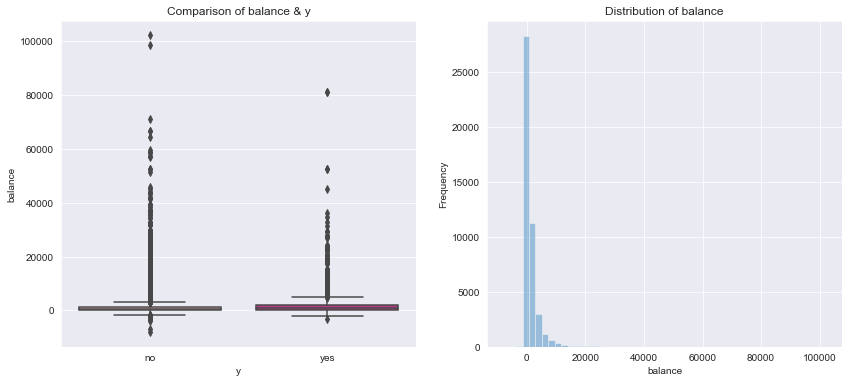

In [176]:
NumericalVariable_Analysist(df, "balance" , target= "y")

- Berdasarkan ouput boxplot, dapat diketahui bahwa pada data balance Data memiliki cukup banyak outlier di atas IQR
- Data menceng ke kanan (possitive skewness) dan ekor data menjulur ke kanan sehingga diketahui bahwa banyak outlier diatas IQR
- kebanyakan sample/responden berpusat pada rentang 0-18000
- Data tertinggi terdapat pada sekitar angka 0.

> day

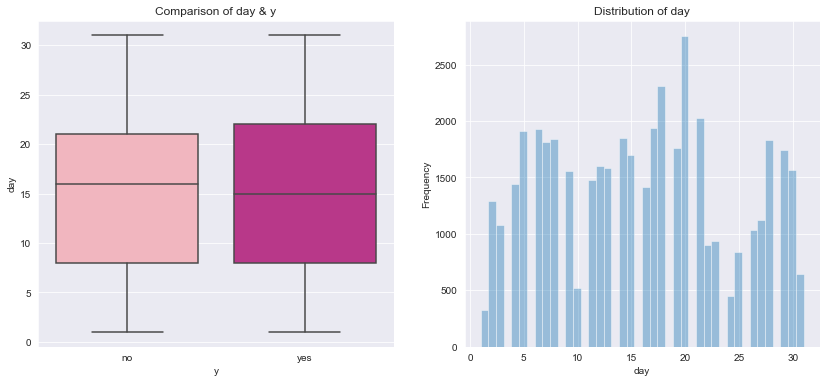

In [177]:
NumericalVariable_Analysist(df, "day", target= "y")

- Berdasarkan ouput boxplot, dapat diketahui bahwa pada data tidak memiliki outlier.
- Data menceng terlihat seimbang dan tersebar acak tidak condong maupun mencecng ke satu sisi, dan tidak ada outlier.
  sehingga dapat diasumsikan data berdistribusi norrmal.
- kebanyakan sample/responden berpusat pada rentang 2  hingga 31
- Data tertinggi terdapat pada sekitar 20 tahun.

> duration

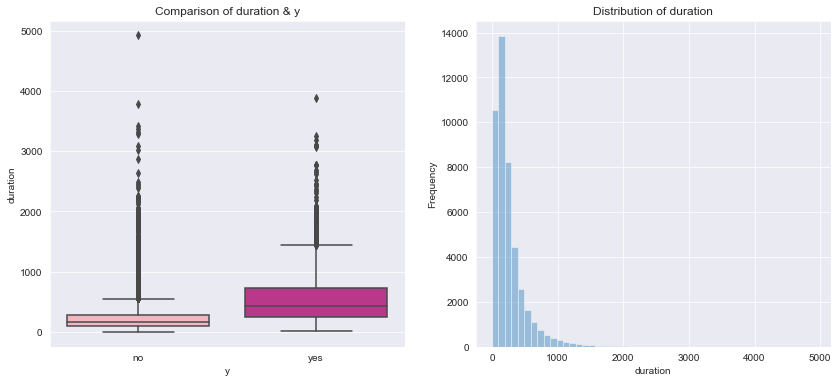

In [178]:
NumericalVariable_Analysist(df, "duration", target= "y")

- Berdasarkan ouput boxplot, dapat diketahui bahwa pada data balance Data memiliki cukup banyak outlier di atas IQR
- Data menceng ke kanan (possitive skewness) dan ekor data menjulur ke kanan sehingga diketahui bahwa banyak outlier diatas IQR
- kebanyakan sample/responden berpusat pada rentang 0  hingga 1500
- Data tertinggi terdapat pada sekitar 200 tahun.

> campaign

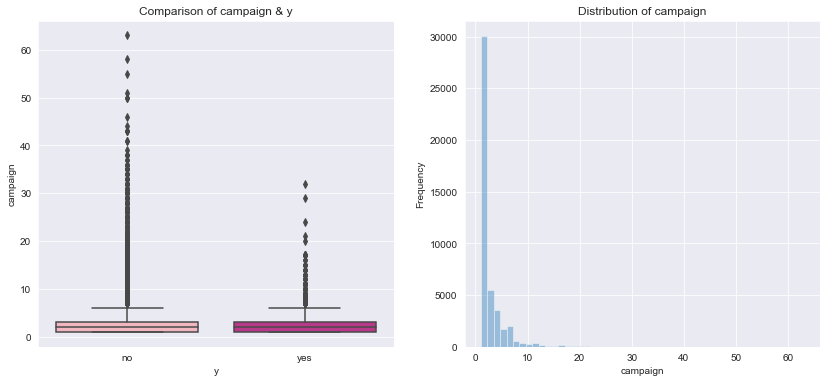

In [179]:
NumericalVariable_Analysist(df, "campaign", target= "y")

- Berdasarkan ouput boxplot, dapat diketahui bahwa pada data balance Data memiliki cukup banyak outlier di atas IQR
- Data menceng ke kiri dan ekor data menjulur ke kanan sehingga diketahui bahwa banyak outlier diatas IQR
- kebanyakan sample/responden berpusat pada rentang 2  hingga 12
- outlier data berada diatas angka 15
- Data tertinggi terdapat pada sekitar 2 tahun.

> pdays

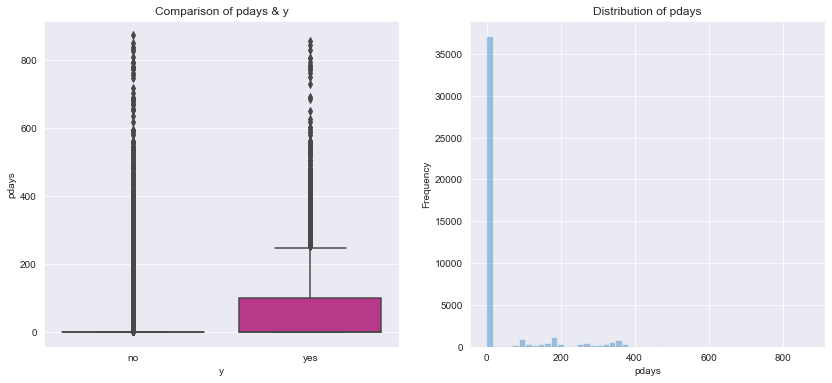

In [180]:
NumericalVariable_Analysist(df, "pdays", target= "y")

- Berdasarkan ouput boxplot, dapat diketahui bahwa pada data balance Data memiliki cukup banyak outlier di atas IQR
- Data menceng ke kanan (possitive skewness) dan ekor data menjulur ke kanan sehingga diketahui bahwa banyak outlier diatas IQR
- kebanyakan sample/responden berpusat pada rentang 0 sekian.
- outlier data berada diatas berada pada interval 100 hingga 400.
- Data tertinggi terdapat pada sekitar 0.

> previous

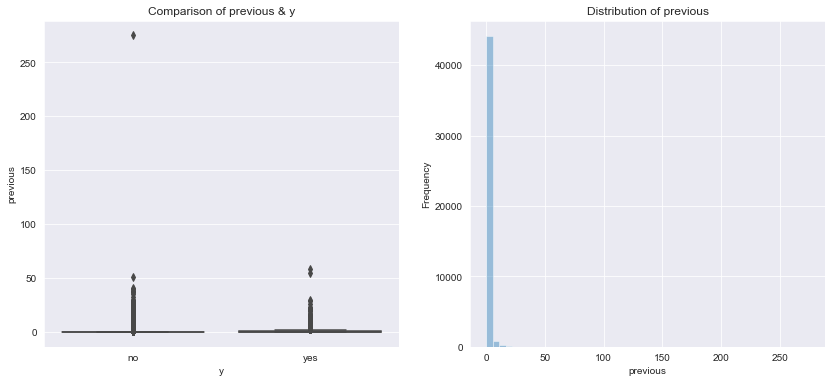

In [181]:
NumericalVariable_Analysist(df, "previous", target= "y")

- Berdasarkan ouput boxplot, dapat diketahui bahwa pada data balance Data memiliki cukup banyak outlier di atas IQR
- Data sedikit menceng ke kanan (possitive skewness) dan ekor data menjulur ke kanan sehingga diketahui bahwa banyak outlier diatas IQR
- kebanyakan sample/responden berpusat pada rentang 0.
- outlier data berada diatas angka 0 sekian ke atas.
- Data tertinggi terdapat pada sekitar 0n.

> Berdasakan representasi masing-masing output diatas, dapat ditarik kesimpulan bahwa:
- Berdasarkan ouput boxplot, hanya satu yang dapat diasumsikan berdistrbusi normal dan tidak memiliki outlier yaitu data day.  Sedangkan untuk data   age, balance, duration, campaign, pdays, dan previousbalance, Data memiliki cukup banyak outlier di atas IQR
- Berdasarkan ouput diagram persebaran data, hanya satu data yang dapat diasumsikan berdistrbusi normal dan tidak memiliki outlier yaitu data day,     Sedangkan  age, balance, duration, campaign, pdays, dan previousbalance menceng ke kanan (possitive skewness) dan ekor data menjulur ke kanan 
- Pusat data dna outlier data beragam.
- Berdasrakan data dapat disimpulkan data day memiliki pengaruh yang erat terhadap kecenderungan seseorang untuk berlangganan deposito. 

#### b. Categorical Analysis
Analisis data ekslporasi pada data kategorik
- Buat CountPlot dan Pie Plot terlebih dahulu untuk mengetahui proporsi data y (Client Deposit Subscribered)
- kemudian buat Function yang dapat memvisulisasikan data numerik dalam boxplot da distribution plot sekaligus

### 2. Bagaimana Proporsi langganan deposit  pada data?
> Countplot dan pie chart adalah  salah satu visualisasi data yang apat digunakan untuk melihat perbandingan atau proporsi dari beberapa data kategorik.

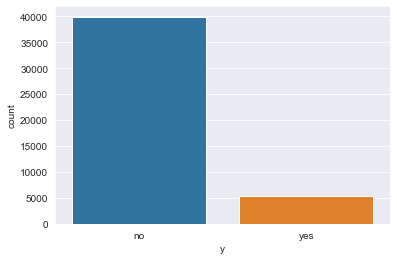

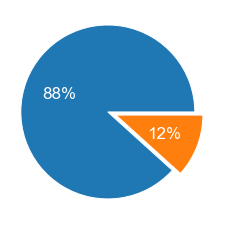

In [209]:
a = sns.countplot(data=df, x="y")
plt.show(a)
b = plt.pie(df['y'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))
plt.show(b)

In [207]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

> Berdasarkan Countplot dapat diketahui bahwa 39922 responden tidak berlangganan deposito dan hanya 5289 responden berlangganan deposito.
> Berdasarkan pie chart dapat diketahui bahwa 88% responden tidak berlangganan deposito dan sisanya berlangganan deposito.
> Drari hasilitu dapat disimpulkan bahwa masih sedikit masyarakat yag berlangganan deposito

### 3. Kelompok apa saja yang memiliki kecenderung berlangganan deposit berdasarkan kategori age, job, marital, education, default, balance, housing,       loan, contact, day, month, duration, campaign, pdays, previous, poutcome ?
> buat Function yang dapat memvisulisasikan data numerik dalam boxplot da distribution plot sekaligus

In [214]:
def CategoricalVariables_Analysist(df, segment_by, invert_axis = False, target = "left"):
    """A function for Plotting the effect of variables(categorical data) on attrition"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df, hue="y", palette= "Set2", ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df, hue="y", palette= "Set2", ax=ax[0])
       
    #plot
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target , data=df, palette= "RdPu",  ci= None)
    else:
        sns.barplot(y = segment_by, x = target , data=df, palette= "RdPu", ci= None)
        
    ax[1].set_title("Subscriber rate by {}".format(segment_by))
    ax[1].set_ylabel("Average (Attrition)")
    plt.tight_layout()
    
    plt.show()

> job

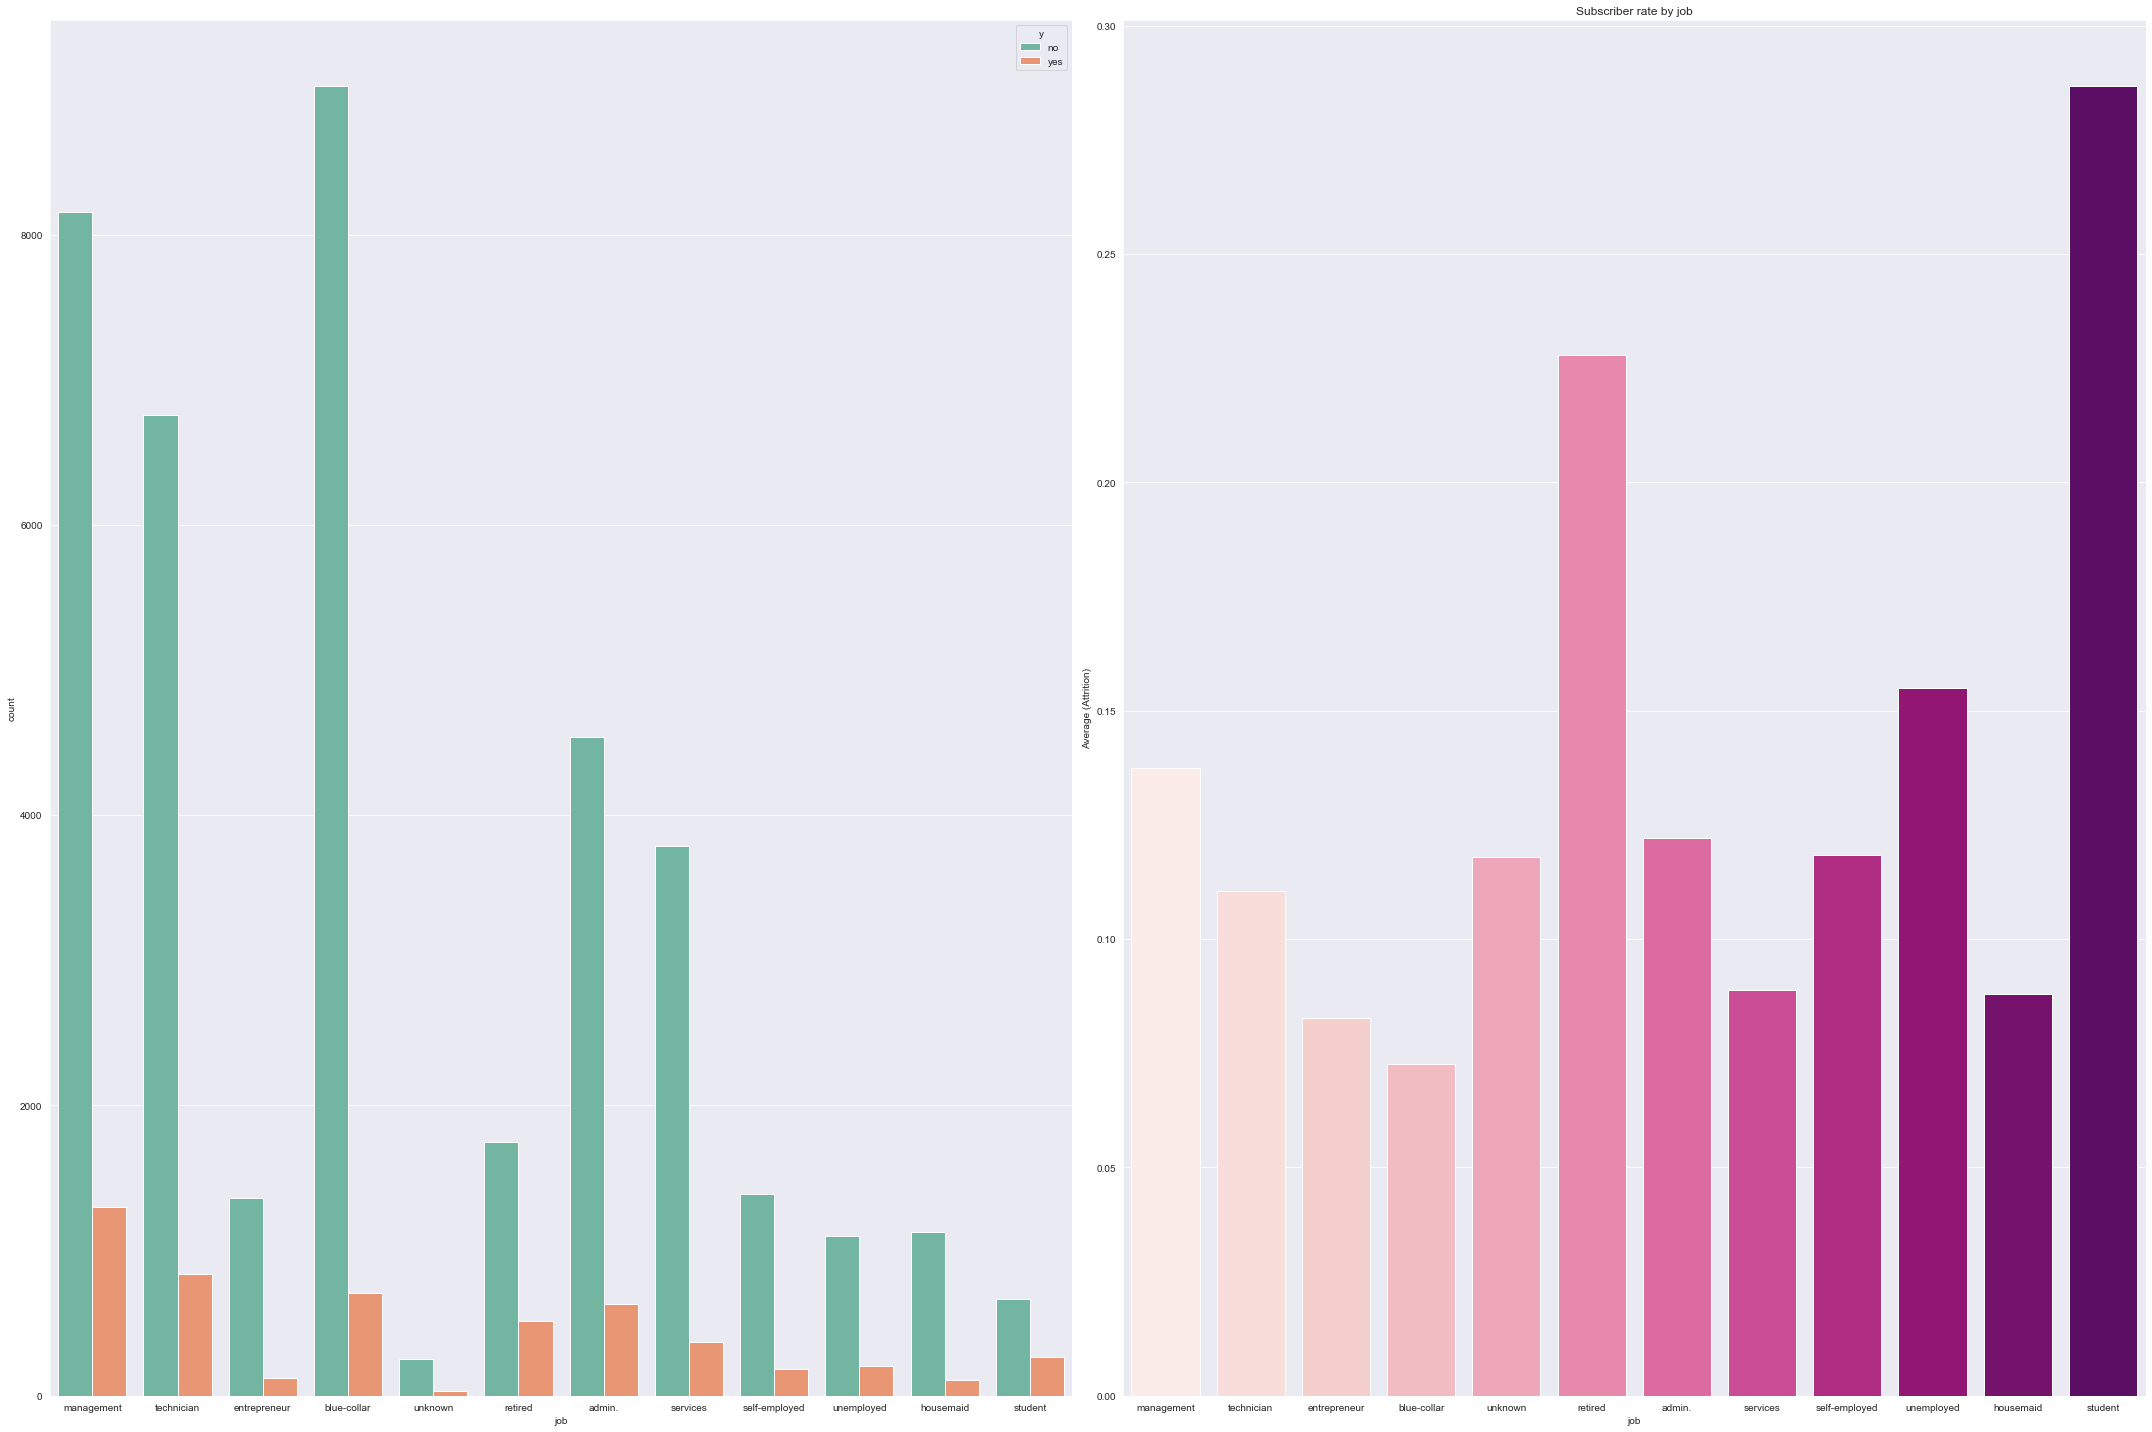

In [215]:
CategoricalVariables_Analysist(df, "job")

> Berdasarkan ouput countplot, dapat diketahui bahwa responsen yang tidak berlangganan deposito lebih banyak 
- Job yang paling banyak tidak berlangganan deposito adalah blue-collar, paling sedikit tidak berlangganan adalah student
- Job yang paling banyak berlangganan deposito adalah management, paling sedikit berlangganan adalah unknown
> Sedangakn secara keseluhuan berdasarkan barplot, Job yang perbandingan pekerjanya paling banyak berlangganan deposito adalah  student

> marital 

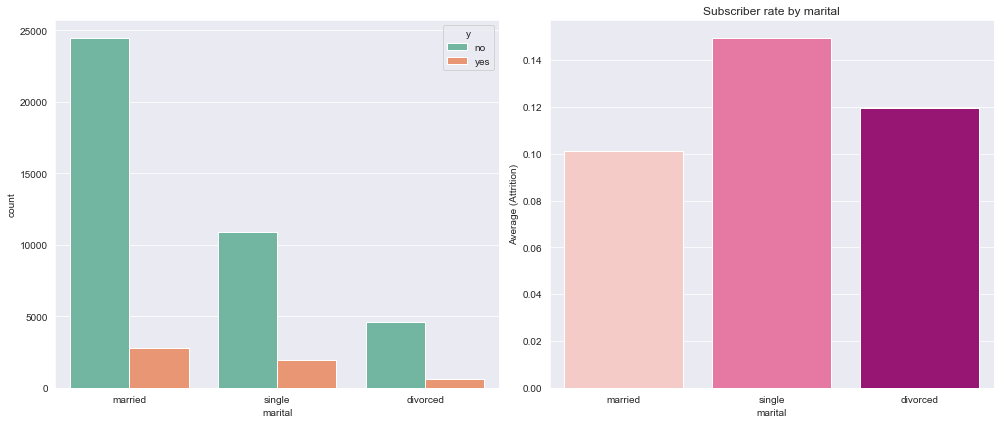

In [165]:
CategoricalVariables_Analysist(df, "marital")

> Berdasarkan ouput countplot, dapat diketahui bahwa responsen yang tidak berlangganan deposito lebih banyak 
- Kalompok yang paling banyak tidak berlangganan deposito adalah MARRIED, paling sedikit tidak berlangganan adalah DIVORCED
- Kelompok yang paling banyak berlangganan deposito adalah MARRIED, paling sedikit berlangganan adalah DIVORCED
> Sedangakn secara keseluhuan berdasarkan barplot, data dengan perbandingan jumlah anggotanya itu paling banyak berlangganan deposito adalah  single.

> education

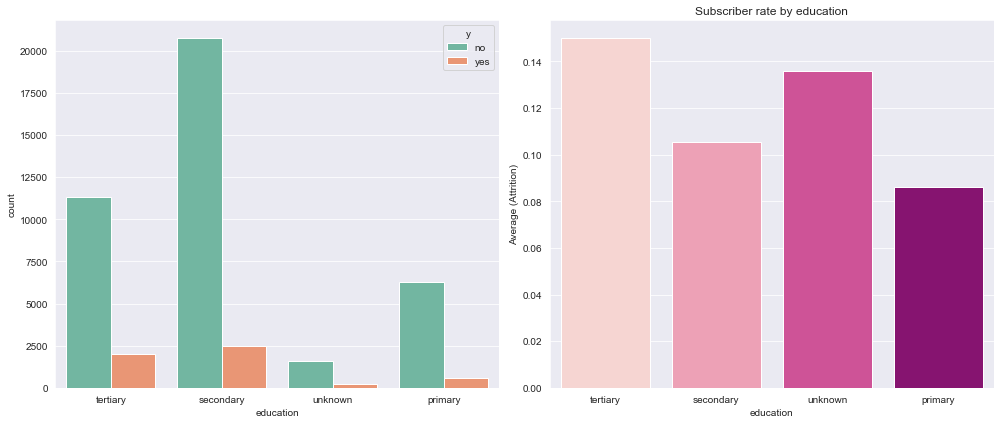

In [166]:
CategoricalVariables_Analysist(df, "education")

> Berdasarkan ouput countplot, dapat diketahui bahwa responsen yang tidak berlangganan deposito lebih banyak 
- Kalompok yang paling banyak tidak berlangganan deposito adalah SECONDARY, paling sedikit tidak berlangganan adalah UNKNOWN
- Kelompok yang paling banyak berlangganan deposito adalah SCONDARY, paling sedikit berlangganan adalah UNKNOWN
> Sedangakn secara keseluhuan berdasarkan barplot, data dengan perbandingan jumlah anggotanya itu paling banyak berlangganan deposito adalah  TERTIARY

> default

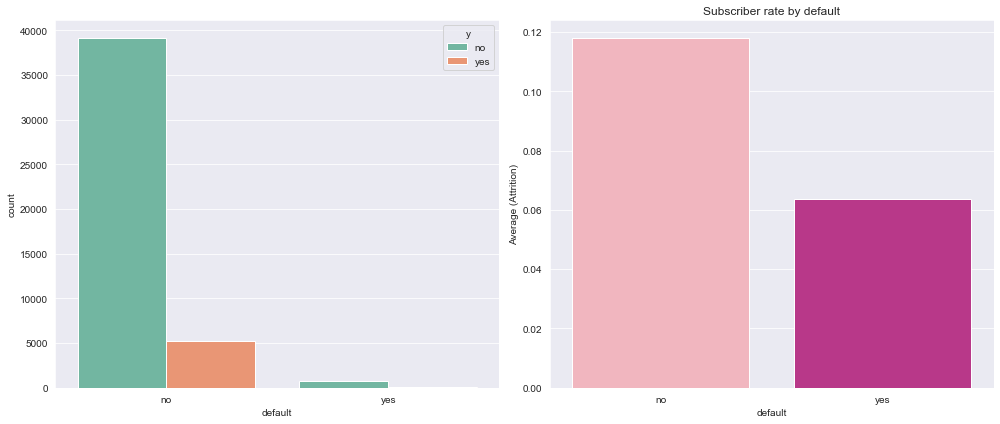

In [167]:
CategoricalVariables_Analysist(df, "default")

> Berdasarkan ouput countplot, dapat diketahui bahwa responsen yang tidak berlangganan deposito lebih banyak 
- Kalompok yang paling banyak tidak berlangganan deposito adalah TIDAK PUNYA KARTU KREDIT, paling sedikit tidak berlangganan adalah PUNYA KARTU KREDIT
- Kelompok yang paling banyak berlangganan deposito adalah MARRITIDAK PUNYA KARTU KREDITED, paling sedikit berlangganan adalah PUNYA KARTU KREDIT
> Sedangakn secara keseluhuan berdasarkan barplot, data dengan perbandingan jumlah anggotanya itu paling banyak berlangganan deposito adalah  TIDAK PUNYA KARTU KREDIT

> housing

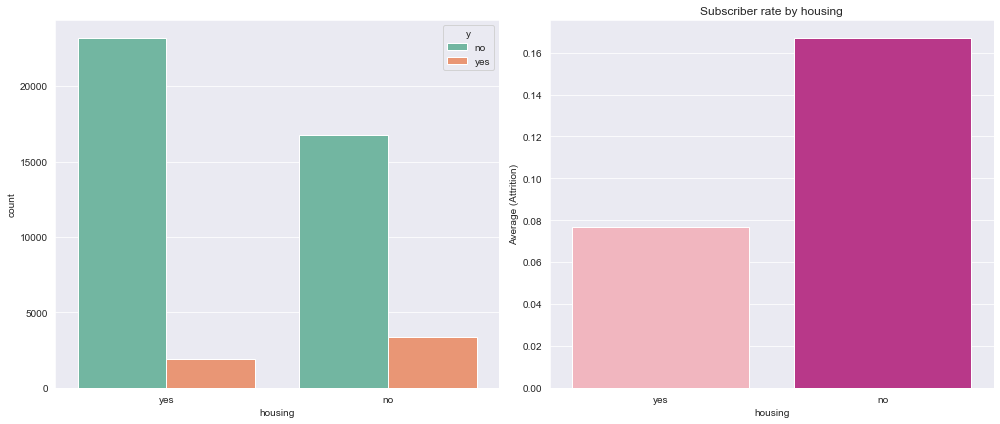

In [168]:
CategoricalVariables_Analysist(df, "housing")

> loan

> Berdasarkan ouput countplot, dapat diketahui bahwa responsen yang tidak berlangganan deposito lebih banyak 
- Kalompok yang paling banyak tidak berlangganan deposito adalah HOUSING, paling sedikit tidak berlangganan adalah TIDAK HOUSING
- Kelompok yang paling banyak berlangganan deposito adalah TIDAK HOUSING, paling sedikit berlangganan adalah HOUSING
> Sedangakn secara keseluhuan berdasarkan barplot, data dengan perbandingan jumlah anggotanya itu paling banyak berlangganan deposito adalah  TIDAK HOUSING

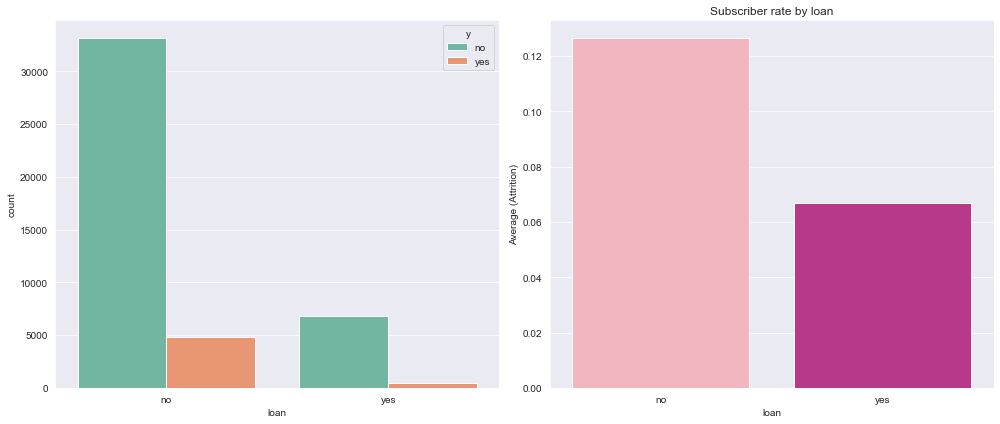

In [169]:
CategoricalVariables_Analysist(df, "loan")

> contact

> Berdasarkan ouput countplot, dapat diketahui bahwa responsen yang tidak berlangganan deposito lebih banyak 
- Kalompok yang paling banyak tidak berlangganan deposito adalah TIDAK LOAN (MEMILIKI PINJAMAN PRIBADI), paling sedikit tidak berlangganan adalah LOAN (MEMILIKI PINJAMAN PRIBADI)
- Kelompok yang paling banyak berlangganan deposito adalah TIDAK LOAN (MEMILIKI PINJAMAN PRIBADI), paling sedikit berlangganan adalah LOAN (MEMILIKI PINJAMAN PRIBADI)
> Sedangakn secara keseluhuan berdasarkan barplot, data dengan perbandingan jumlah anggotanya itu paling banyak berlangganan deposito adalah  LOAN (MEMILIKI PINJAMAN PRIBADI)

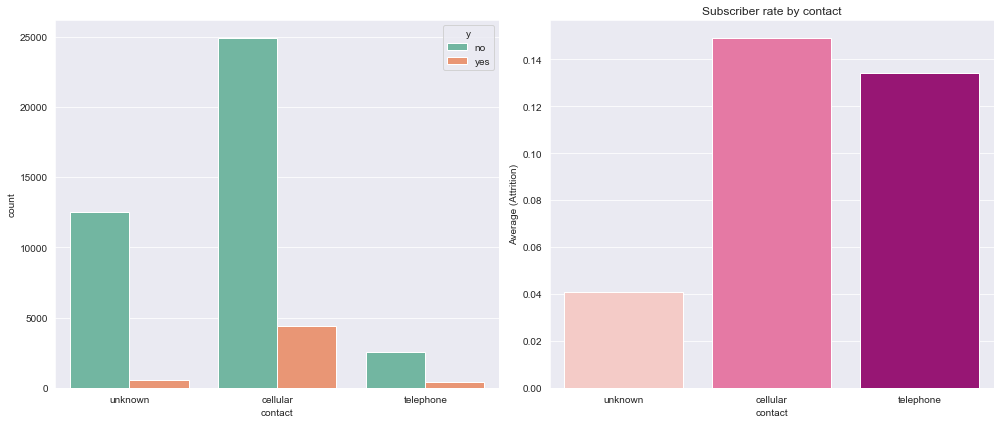

In [170]:
CategoricalVariables_Analysist(df, "contact")

> Berdasarkan ouput countplot, dapat diketahui bahwa responsen yang tidak berlangganan deposito lebih banyak 
- Kalompok yang paling banyak tidak berlangganan deposito adalah cellular, paling sedikit tidak berlangganan adalah telephone
- Kelompok yang paling banyak berlangganan deposito adalah cellular, paling sedikit berlangganan adalah telephone
> Sedangakn secara keseluhuan berdasarkan barplot, data dengan perbandingan jumlah anggotanya itu paling banyak berlangganan deposito adalah  cellular

> month

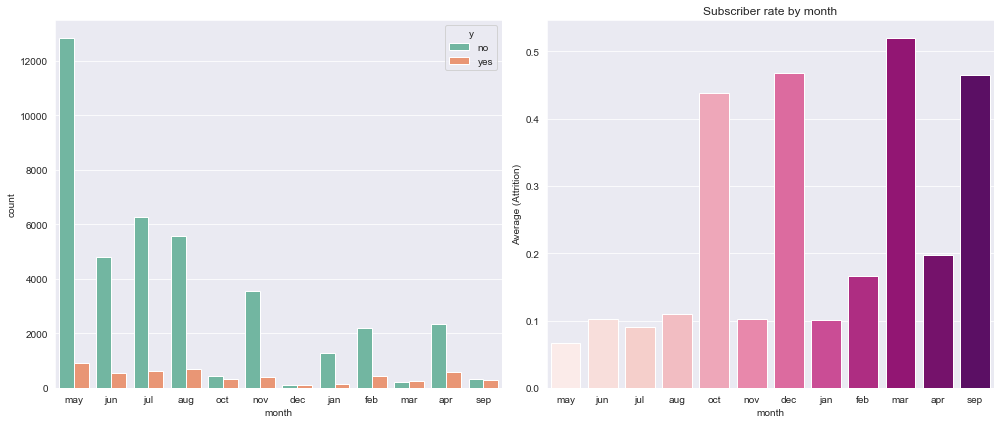

In [171]:
CategoricalVariables_Analysist(df, "month")

> poutcome

> Berdasarkan ouput countplot, dapat diketahui bahwa responsen yang tidak berlangganan deposito lebih banyak 
- Kalompok yang paling banyak tidak berlangganan deposito adalah MAY, paling sedikit tidak berlangganan adalah DECEMBER
- Kelompok yang paling banyak berlangganan deposito adalah MAY, paling sedikit berlangganan adalah DECEMBER
> Sedangakn secara keseluhuan berdasarkan barplot, data dengan perbandingan jumlah anggotanya itu paling banyak berlangganan deposito adalah  MARET

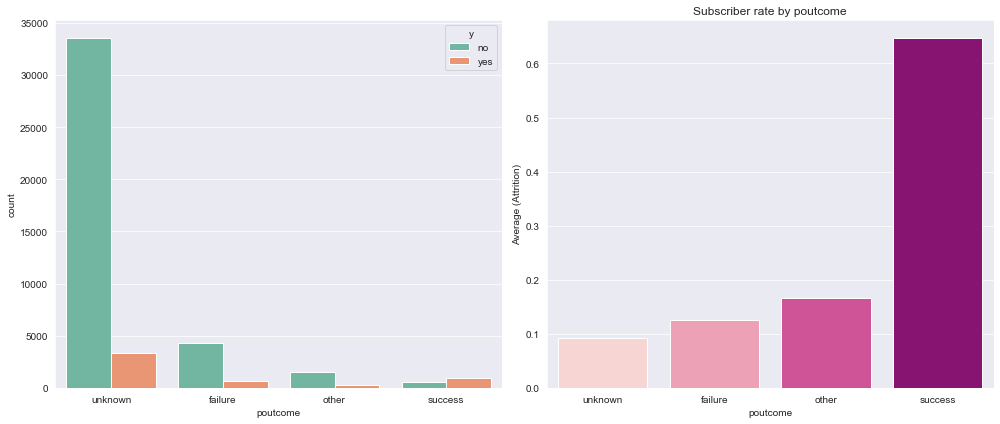

In [172]:
CategoricalVariables_Analysist(df, "poutcome")

# 

> Berdasarkan ouput countplot, dapat diketahui bahwa responsen yang tidak berlangganan deposito lebih banyak 
- Kalompok yang paling banyak tidak berlangganan deposito adalah UNKONOWN, paling sedikit tidak berlangganan adalah success
- Kelompok yang paling banyak berlangganan deposito adalah UNKNOWN, paling sedikit berlangganan adalah OTHER
> Sedangakn secara keseluhuan berdasarkan barplot, data dengan perbandingan jumlah anggotanya itu paling banyak berlangganan deposito adalah  SUCCESS

> Sehingga dapat disimpulakn bahwa kemungkinan kategori yang dapat menjadi faktor yang dapat mempengaruhi  seseorang berlangganan deposito adalah
> ketika job = student, marital = single, education = tertiary, default = no (tidak memiliki kartu kreit), Housing = no  (tidak perumahan), load = yes (tidak memiliki pijaman pribadi), contact =celluler, mouth = maret, dan poutcome = success. 

> Attrition

### 4. Data apa saja yang memiliki korelasi yang kuat mempengaruhi seseorang berlangganan deposito ?
> buat heatmap untuk mengetahui korelasi antar data.

<AxesSubplot:>

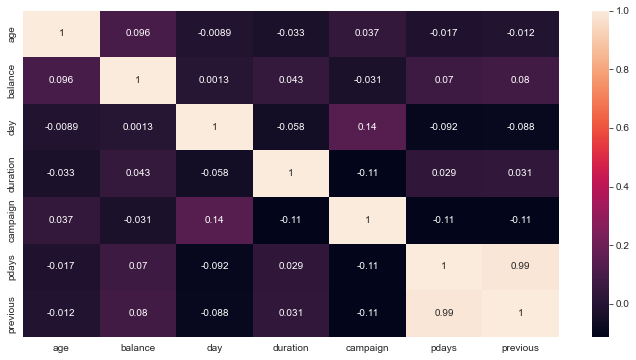

In [159]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(['int64','float64']).corr('spearman'), annot=True)

> Berdasarkan heatmap, dapat diketahui bahwa
- korelasi data terbesar dimiliki antara data previous dengan pdays yaitu sebesar 0,99
  ini menunjukkan bahwa hampir sempurna kedua variabel saling berhubungan karena mendekati datu.
  apabila previous naik satu angka maka pdays akan naik 0.99 kali lipat angka tersebut, begitu pun sebaliknya.
- korelasi data yang terkecil dimiliki oleh data day dan balance yaitu besar 0.0013
  artinya bahwa korelasinya sangat rendah karena mendekati nol.
  apabila previous naik satu angka maka pdays akan naik hanya 0.0013 kali lipat angka tersebut, begitu pun sebaliknya.

# 

## SUMMARY

> Berdasakan representasi masing-masing output diatas, dapat ditarik kesimpulan bahwa:
- Berdasarkan ouput boxplot, hanya satu yang dapat diasumsikan berdistrbusi normal dan tidak memiliki outlier yaitu data day.  Sedangkan untuk data   age, balance, duration, campaign, pdays, dan previousbalance, Data memiliki cukup banyak outlier di atas IQR
- Berdasarkan ouput diagram persebaran data, hanya satu data yang dapat diasumsikan berdistrbusi normal dan tidak memiliki outlier yaitu data day,     Sedangkan  age, balance, duration, campaign, pdays, dan previousbalance menceng ke kanan (possitive skewness) dan ekor data menjulur ke kanan 
- Pusat data dna outlier data beragam.
- Berdasrakan data dapat disimpulkan data day memiliki pengaruh yang erat terhadap kecenderungan seseorang untuk berlangganan deposito. 

> Proporsi data
- Berdasarkan Countplot dapat diketahui bahwa 39922 responden tidak berlangganan deposito dan hanya 5289 responden berlangganan deposito.
- Berdasarkan pie chart dapat diketahui bahwa 88% responden tidak berlangganan deposito dan sisanya berlangganan deposito.
- Drari hasilitu dapat disimpulkan bahwa masih sedikit masyarakat yag berlangganan deposito

> Sehingga dapat disimpulakn bahwa kemungkinan kategori yang dapat menjadi faktor yang dapat mempengaruhi  seseorang berlangganan deposito adalah 
- ketika job = student, marital = single, education = tertiary, default = no (tidak memiliki kartu kreit), Housing = no  (tidak perumahan), load = yes (tidak memiliki pijaman pribadi), contact =celluler, mouth = maret, dan poutcome = success. 

> Berdasarkan heatmap, dapat diketahui bahwa
- korelasi data terbesar dimiliki antara data previous dengan pdays yaitu sebesar 0,99
  ini menunjukkan bahwa hampir sempurna kedua variabel saling berhubungan karena mendekati datu.
  apabila previous naik satu angka maka pdays akan naik 0.99 kali lipat angka tersebut, begitu pun sebaliknya.
- korelasi data yang terkecil dimiliki oleh data day dan balance yaitu besar 0.0013
  artinya bahwa korelasinya sangat rendah karena mendekati nol.
  apabila previous naik satu angka maka pdays akan naik hanya 0.0013 kali lipat angka tersebut, begitu pun sebaliknya.